In [1]:
import sys
from collections import namedtuple
import numpy as np
from uncertainties import ufloat, unumpy
import uncertainties
import scipy
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

sys.path.append("..")

from hists.parameters import beamEnergies
from hist_loader import HistLoader
from sigma_over_e import SigmaOverEComputations, fitSigmaOverE, SigmaOverEPlotElement, plotSigmaOverMean, sigmaOverE_fitFunction, plotSCAsEllipse
from ntupleReaders.clue_ntuple_reader import ClueNtupleReader
#from fit import HistogramEstimates

/grid_mnt/vol_home/llr/cms/cuisset/mambaforge/envs/clustering-analysis/lib/python3.10/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/grid_mnt/vol_home/llr/cms/cuisset/mambaforge/envs/clustering-analysis/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
reader = ClueNtupleReader("v40", "cmssw", "sim_proton_v46_patchMIP")

In [3]:
loader = HistLoader(reader.histStore)

In [4]:
comp_sigma_e = SigmaOverEComputations(sigmaWindow=(1, 2.5))

In [5]:
sigma_e_results = comp_sigma_e.compute({beamEnergy : loader.getRechitsProjected(reader.datatype, beamEnergy) for beamEnergy in beamEnergies}, multithread=False)

Iterative fitting - 19 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 29 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 48 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 78 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 97 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 116 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 145 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 192 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 237 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 279 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

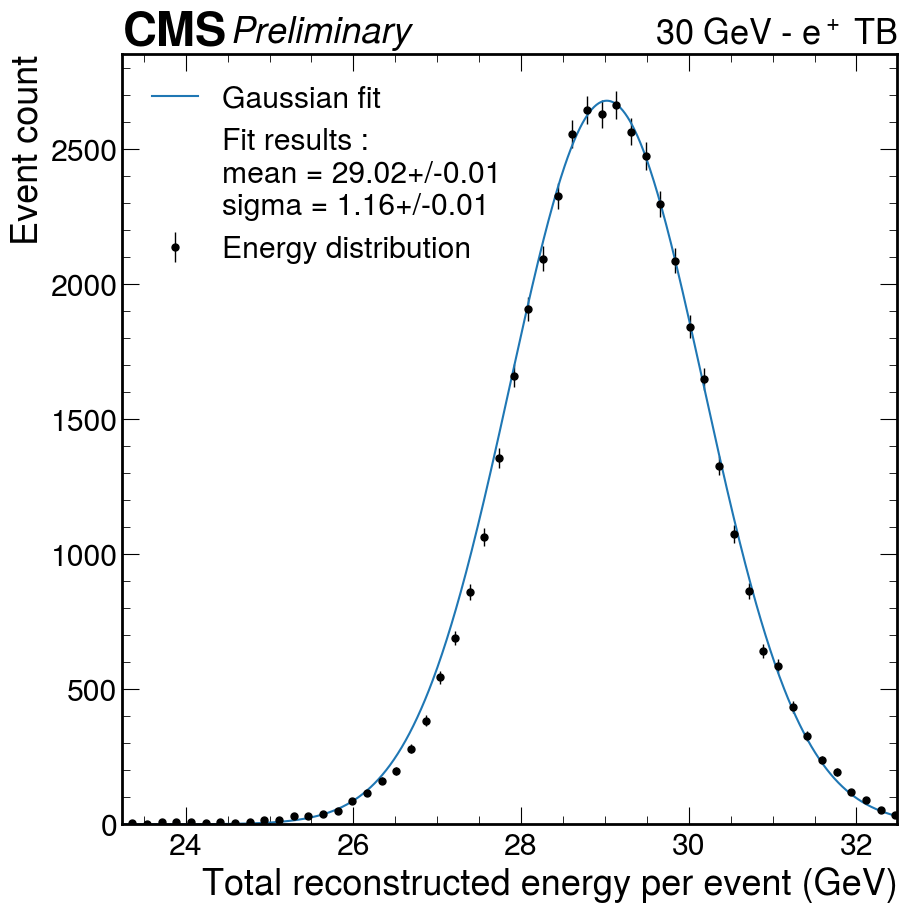

In [12]:
comp_sigma_e.plotFitResult(30)

In [ ]:
sigma_e_results

{20: SigmaMuResult(mu=19.642366824872624+/-0.012054749735860655, sigma=0.9496458841917433+/-0.010579747559261247, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7f9d784e3370>),
 30: SigmaMuResult(mu=29.506744068927162+/-0.014466247508889545, sigma=1.1674343025700376+/-0.0122511607807723, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7f9c98717820>),
 50: SigmaMuResult(mu=49.856036786564644+/-0.01197039213326603, sigma=1.5727286921343682+/-0.00999551992356701, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7f9cdc276c50>),
 80: SigmaMuResult(mu=80.34000320025832+/-0.01795927225217861, sigma=2.0447086242453545+/-0.014593646516581424, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7f9d1c778100>),
 100: SigmaMuResult(mu=100.75459832995023+/-0.02718503300142054, sigma=2.3598803513052102+/-0.022014229332668847, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7f9ca0716e00>),
 120: SigmaMuResult(mu=121.20775518004389+/-0.031689067614360

In [13]:
fitSigmaOverE(sigma_e_results)

EResolutionFitResult(S=0.21496682534382178+/-0.0010444903975783705, C=0.0045109700718818455+/-0.0003474852693080027)

In [14]:
plotElt = SigmaOverEPlotElement("Rechits data", fitSigmaOverE(sigma_e_results), sigmaOverE_fitFunction, {beamEnergy : result.sigma / result.mu for beamEnergy, result in sigma_e_results.items()}, None, None)

In [17]:
import pickle
import os
with open(os.path.join(reader.pathToFolder, "sigmaOverE", "rechits.pickle"), 'wb') as f:
    pickle.dump(plotElt, f)

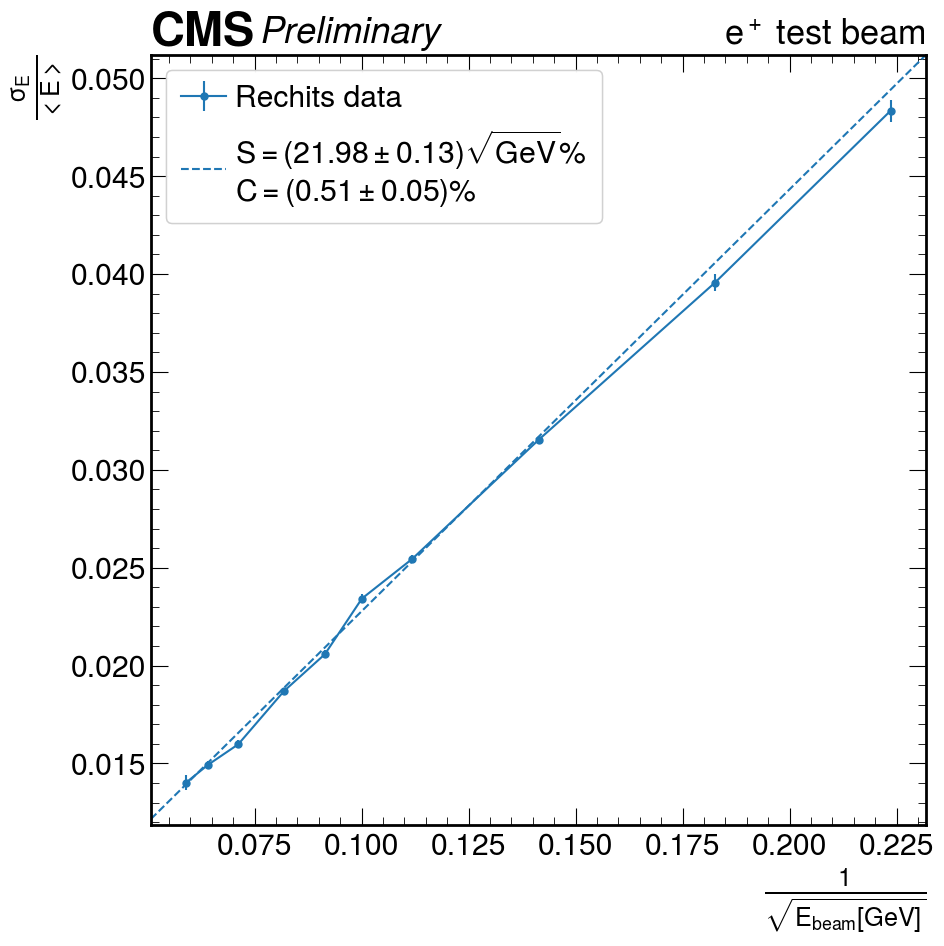

In [ ]:
plotSigmaOverMean([plotElt], xMode="1/sqrt(E)", plotFit=True)

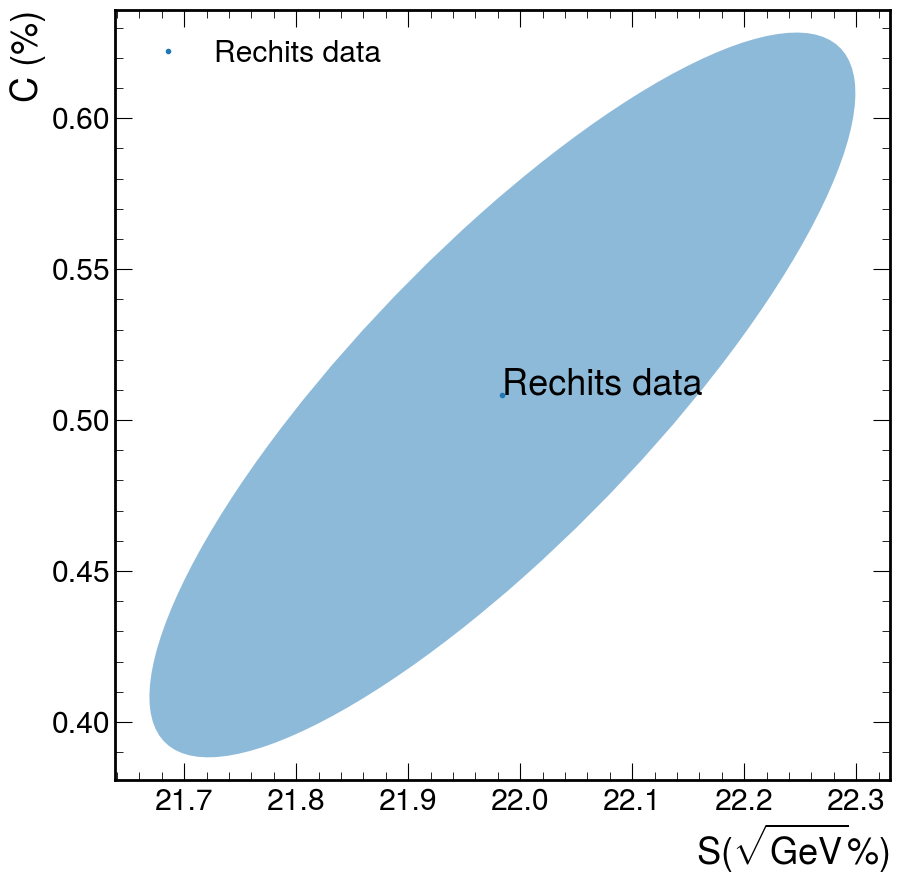

In [ ]:
plotSCAsEllipse([plotElt])